In [26]:
#Importar los paquetes:
import numpy as np
import pandas as pd
from pandas import read_excel
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import time
import seaborn as sns

1.1

In [ ]:
# Función que permite crear las matrices de adyacencia a partir de listados de 0 y 1. 
def matrix_creator(list, n):
    m=len(list)
    if 2*m==(n*(n-1)):
        counter=1
        A=[]
        AA=[0 for i in range(n)]
        while counter<n+1:
            limit=n-counter
            B=list[:limit]
            lista=list[limit:]
            C=AA[:counter]+B
            A.append(C)
            counter+=1
        A=np.array(A)
        return A+np.transpose(A)
    else:
        print("Fill with right inputs")

In [ ]:
#Funcion que genera una red de longitud n
def network_creator(n):
    A=[0]*n
    B=[1]*n
    saver=set()
    counter=1
    while counter<n:
        C=B[:counter]+A[counter:]
        saver=saver.union(set(it.permutations(C,n)))
        counter+=1
    saver=[list(i) for i in saver]
    saver=[A]+saver+[B]
    return(saver)

In [ ]:
n=5
long=int(((n-1)*n)/2)
adjM=[matrix_creator(i,n) for i in network_creator(long)]
gs=[nx.from_numpy_array(i) for i in adjM]

In [ ]:
revisor={i:True for i in range(len(gs))}
for i in revisor:
    for j in revisor:
        if j>i and revisor[i] and revisor[j] :
            if nx.is_isomorphic(gs[i], gs[j]):
                revisor[j]=False

gs_def=[gs[i] for i in revisor if revisor[i]]
adjM_def=[adjM[i] for i in revisor if revisor[i]]

1.2

In [ ]:
# Función de utilidad que nos permite generar las utilidades relevantes
def utility_function(grafo):
    utility_0=dict(grafo.degree())
    utility={i:(utility_0[i])**0.5 for i in utility_0}
    return utility
# Esta funcion crea un diccionario con llaves = nodos i y valores = U_i(grafo)

In [ ]:
#Se crea objeto con las utilidades de cada nodo
utilities=[utility_function(i) for i in gs_def]
for i in range(len(gs_def)):
    nx.set_node_attributes(gs_def[i], utilities[i], "Utility")

1.3

In [ ]:
#Se define la lista de utilidades totales de todos los grafos. La utilidad total de cada grafo se define 
#  como la suma de las utilidades de cada nodo
social_utility=[sum(list(nx.get_node_attributes(gs_def[i], "Utility").values())) for i in range(len(gs_def))]
#Se obtiene el valor maximo entre todas las utilidades
max_social_utility=max(social_utility)
#Se crea la lista con los grafos cuya utilidad social es el maximo
gs_SE=[gs_def[i] for i in range(len(social_utility)) if social_utility[i]==max_social_utility]

for i in gs_SE:
    print("_"*30)
    nx.draw(i)

1.4

In [ ]:
utilities_i=[list(nx.get_node_attributes(gs_def[i], "Utility").values()) for i in range(len(gs_def))]
gs_PE=[]

for k in range(0,len(gs_def)):
    a=([sum(np.greater_equal(utilities_i[j], utilities_i[k])) 
    for j in range(0,len(gs_def)) if j!=k and sum(np.equal(utilities_i[j], utilities_i[k]))!=5])
    if max(a)<5:
        print(k)
        gs_PE=gs_PE+[gs_def[k]]
    
for i in gs_PE:
    print("_"*30)
    nx.draw(i)

2.1

2.2

2.3

2.4

2.5

3.1

In [27]:
os.chdir("C:/Users/ASUS/Documents/Universidad de los Andes/2022-2/Modelos de Interacciones Sociales/Taller 1")
A=pd.read_excel(r"Matriz insumo-producto 2017.xlsx", "MIP", engine="openpyxl")
A.rename(columns={"Unnamed: 0":"Sectores"}, inplace=True)
A.set_index("Sectores", inplace=True)
num=A.iloc[:, 0:24]
B=A.iloc[:, 0:25]
d=A.iloc[:, 24:25]
den=B.sum(axis=1)
den=pd.DataFrame(den)
den=den[den.columns.repeat(24)]
den=den.T
cols=list(den.columns.values)
den["Sectores"]=cols
den.set_index("Sectores", inplace=True)
A=num/den
A=pd.DataFrame(A)
A.to_csv("A.csv", decimal=",", index=False) 

3.2 

In [28]:
L=np.linalg.inv(np.identity(24)-A)

3.3


In [29]:
d=pd.DataFrame(d)
d.to_csv("d.csv", decimal=",", index=False) 

3.4

,x
count,24.000000
mean,60964.541667
std,39940.164260
min,201.769366
25%,30975.829955
50%,59078.096387
75%,86805.930732
max,154659.662547


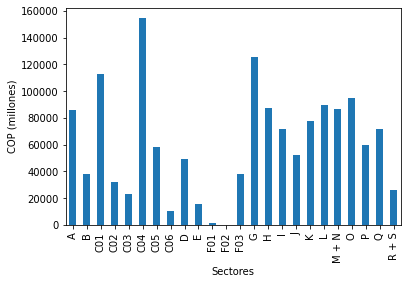

In [33]:
x=np.matmul(L, d)
x["Sectores"]=cols
x.set_index("Sectores", inplace=True)
x.rename(columns={"Gasto de Consumo Final":"x"}, inplace=True)
x.plot.bar(y="x", legend=None)
plt.xlabel("Sectores")
plt.ylabel("COP (millones)")
plt.savefig("x.jpg")
plt.savefig("x.jpg", bbox_inches = "tight")
x.describe()

3.5

,delta_x
count,24.000000
mean,-6096.454167
std,3994.016426
min,-15465.966255
25%,-8680.593073
50%,-5907.809639
75%,-3097.582995
max,-20.176937


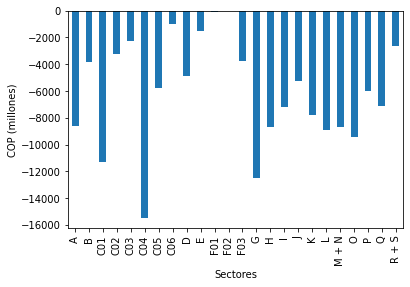

In [22]:
delta_d=-0.1*d
delta_x=np.matmul(L, delta_d)
delta_x["Sectores"]=cols
delta_x.set_index("Sectores", inplace=True)
delta_x.rename(columns={"Gasto de Consumo Final":"delta_x"}, inplace=True)
delta_x.plot.bar(y="delta_x", legend=None)
plt.xlabel("Sectores")
plt.ylabel("COP (millones)")
plt.savefig("delta_x.jpg", bbox_inches = "tight")
delta_x.describe()